In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [3]:
p=20
n=1000
x=np.random.randn(n,p)
k=np.array([np.random.randn() if np.random.rand()<0.5 else 0 for i in range(p)]).reshape(-1,1)
b=np.random.randn(n).reshape(-1,1)

In [52]:
k.shape

(20, 1)

In [4]:
y=x@k+b

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [25]:
def RegSubsets(X_train,y_train,nvmx:int,X_test=None,y_test=None):
    '''
    X_train:
        np array, independent variables
    y_train:
        np array, dependent variables
    nvmx:
        int number of features to select
    newx:
        np array, test set, will predict on train set if none
    '''
    linreg = LinearRegression()
    if X_test is None:
        X_test=X_train
        y_test=y_train
    mse = []
    for i in range(1, nvmx):
        rfe = RFE(linreg, n_features_to_select=i)
        rfe.fit(X_train, y_train)
        linreg.fit(X_train[:, rfe.support_], y_train)
        y_pred = linreg.predict(X_test[:, rfe.support_])
        mse.append(mean_squared_error(y_test, y_pred))
    return mse

def get_selected_features(X_train,y_train,id):
    linreg = LinearRegression()
    # for i in range(1, nvmx):
    rfe = RFE(linreg, n_features_to_select=id)
    rfe.fit(X_train, y_train)
    feature_index=list(np.where(rfe.support_==True)[0])
    return feature_index



In [93]:
class RegSubsets():
    def __init__(self,X_train,y_train,nvmx:int):
        self.X_train = X_train
        self.y_train = y_train
        self.nvmx = nvmx
    def fit(self,X_test=None,y_test=None):
        '''
        if test set is not given, then model predict on train set
        return mse of each model size
        '''
        linreg = LinearRegression()
        if X_test is None:
            X_test=self.X_train
            y_test=self.y_train
        mse = []
        for i in range(1, self.nvmx):
            rfe = RFE(linreg, n_features_to_select=i)
            rfe.fit(self.X_train, self.y_train)
            linreg.fit(self.X_train[:, rfe.support_], self.y_train)
            linreg.coef_
            y_pred = linreg.predict(X_test[:, rfe.support_])
            mse.append(mean_squared_error(y_test, y_pred))
        self.mse=mse
        # return self.mse
    def get_slope_distance(self):
        '''
        returns the euclidean distance between the slopes in the dataset and the predited slopes in each model size
        '''
        linreg = LinearRegression()
        slope_dif=[]
        for i in range(1, self.nvmx):
            rfe = RFE(linreg, n_features_to_select=i)
            rfe.fit(self.X_train, self.y_train)
            linreg.fit(self.X_train[:, rfe.support_], self.y_train)
            feature_index=list(np.where(rfe.support_==True)[0])
            # get the slopes of the selected features in the dataset
            slope_train=k[feature_index,]
            # get the predicted slope of the selected features
            slope_pred=linreg.coef_.reshape(-1,1)
            # calculate the difference
            dif=slope_train-slope_pred
            # create a temporary array
            temp=np.array([])
            # loop over the numbers
            for i in dif:
                # add each squared element to the temporary array
                temp=np.append(temp,np.square(i[0]))
            # calculate the euclidean distance
            dis=np.sqrt(np.sum(temp))
            slope_dif.append(dis)
        return slope_dif

In [94]:
regsubsets=RegSubsets(X_train,y_train,p)
regsubsets.fit()
regsubsets.get_slope_distance()

[0.8344032371539898,
 0.8338418673177632,
 0.8663653622681139,
 0.5527227860744305,
 0.5977966700581985,
 0.43650074152226515,
 0.4534067954562698,
 0.42176269940116007,
 0.3874165423366538,
 0.4113475980857317,
 0.46386763758298866,
 0.4802371850943766,
 0.4964340008983332,
 0.5068890937361623,
 0.5202160260880051,
 0.529415330140836,
 0.5368159939716179,
 0.5398834703897275,
 0.5429969652658073]

In [95]:
regsubsets.get_slope_distance()

[0.8344032371539898,
 0.8338418673177632,
 0.8663653622681139,
 0.5527227860744305,
 0.5977966700581985,
 0.43650074152226515,
 0.4534067954562698,
 0.42176269940116007,
 0.3874165423366538,
 0.4113475980857317,
 0.46386763758298866,
 0.4802371850943766,
 0.4964340008983332,
 0.5068890937361623,
 0.5202160260880051,
 0.529415330140836,
 0.5368159939716179,
 0.5398834703897275,
 0.5429969652658073]

In [27]:
idx=get_selected_features(X_train,y_train,2)
X_test[:,idx]

array([[ 0.58332673,  1.84570662],
       [-0.58878392, -1.17005008],
       [ 0.0862354 , -0.27795227],
       ...,
       [ 0.56024402,  0.57881065],
       [ 0.77325024,  0.21894157],
       [-0.69502918,  0.27779712]])

In [8]:
train_mse=RegSubsets(X_train,y_train,nvmx=p)
# train_mse
test_mse=RegSubsets(X_train,y_train,p,X_test,y_test)
test_mse

[11.590918367909945,
 9.477836337692498,
 6.977007728271542,
 4.5926674035619826,
 3.752372555877161,
 2.3395847258072635,
 1.4862230912885446,
 1.3676357700429613,
 1.2197691471467884,
 1.1756536885393472,
 1.2380635315063242,
 1.2426482123782556,
 1.2505572383357897,
 1.257676755937432,
 1.2766112244250318,
 1.2806805407160482,
 1.2954128305417665,
 1.2948508464187631,
 1.2956911242649636]

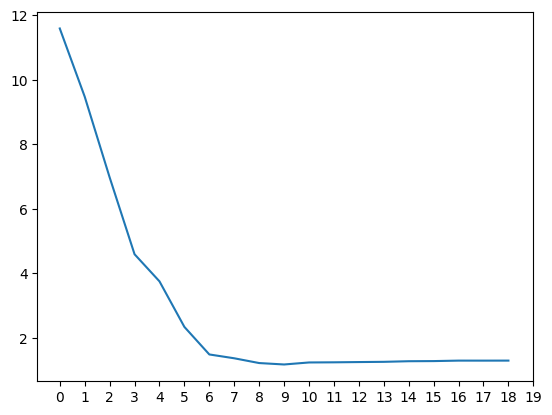

In [9]:
plt.plot(list(range(19)),test_mse)
plt.xticks(range(0,20))
plt.show()

In [69]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)
selector = selector.fit(x, y)
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

In [24]:
a=np.zeros((2,3))
a[:,[1,2]]

array([[0., 0.],
       [0., 0.]])

In [76]:
a=np.array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, True, False, False, False, False, False, False,])
b=np.where(a==True)

In [81]:
b[0].tolist()

[18, 19]